In [214]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [215]:
#Read input file and understand the data
# "default" is my dependent variable
df = pd.read_csv("german_credit.csv")
df.shape

(1000, 21)

In [216]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [218]:
df.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [219]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [220]:
# Print Shape of model data
# Identify the categorical columns and numerical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical Columns : ", categorical_columns)

Categorical Columns :  ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [221]:
df_dummies = pd.get_dummies(data=df,columns=categorical_columns)
df_dummies.shape

(1000, 62)

In [222]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

In [223]:
df_dummies.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.269000,0.274000,...,0.713000,0.179000,0.148000,0.630000,0.022000,0.2000,0.596000,0.404000,0.037000,0.963000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.443662,0.446232,...,0.452588,0.383544,0.355278,0.483046,0.146757,0.4002,0.490943,0.490943,0.188856,0.188856
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


### Check for highly correlated variables but don't required any treatment for this use case

In [224]:
df_dummies.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

* All the categorical columns were replaced with the corresponding possible dummy columns. Actuals columns were not left back.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [225]:
from sklearn.model_selection import train_test_split
X = df_dummies.drop(labels='default', axis=1)
y = df_dummies.default

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [226]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion='entropy', random_state=9999)
rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [227]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(" ====== Confusion Matrix ========= ")
confusion_matrix(y_test, y_pred)

 ====== Confusion Matrix ========= 


array([[197,  17],
       [ 60,  26]])

In [228]:
print("------- Accuracy Score --------")
print(accuracy_score(y_test, y_pred))

------- Accuracy Score --------
0.7433333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [229]:
rfcl.feature_importances_

array([0.0720369 , 0.10011299, 0.03698526, 0.03336023, 0.07812153,
       0.01887908, 0.01134648, 0.01671098, 0.03092904, 0.00733814,
       0.0447593 , 0.00769965, 0.02938331, 0.00989199, 0.01463478,
       0.01253093, 0.00565399, 0.01148948, 0.01805625, 0.01189063,
       0.01544127, 0.00444066, 0.0015188 , 0.01262918, 0.002495  ,
       0.00095491, 0.00854398, 0.02014251, 0.00914877, 0.00585681,
       0.01370746, 0.01401708, 0.01406608, 0.0150978 , 0.01236615,
       0.00753987, 0.01564968, 0.00650298, 0.00716742, 0.01598798,
       0.00792537, 0.00874017, 0.01067193, 0.01268978, 0.01412935,
       0.01491938, 0.01014396, 0.01428347, 0.01744218, 0.00769151,
       0.00703641, 0.01458963, 0.01045272, 0.0115418 , 0.01510074,
       0.00197804, 0.01112365, 0.01424959, 0.0143988 , 0.00275009,
       0.00305608])

In [230]:
feature_imp_dict = dict(zip(df_dummies.columns, rfcl.feature_importances_))

In [231]:
feature_imp_dict

{'default': 0.07203690111350995,
 'duration_in_month': 0.1001129917681643,
 'credit_amount': 0.03698525786944085,
 'installment_as_income_perc': 0.03336022705168979,
 'present_res_since': 0.07812153082064333,
 'age': 0.018879083535717503,
 'credits_this_bank': 0.011346478347240464,
 'people_under_maintenance': 0.016710984651212343,
 'account_check_status_0 <= ... < 200 DM': 0.030929037780372422,
 'account_check_status_< 0 DM': 0.007338137696241065,
 'account_check_status_>= 200 DM / salary assignments for at least 1 year': 0.044759300856574556,
 'account_check_status_no checking account': 0.0076996527659395336,
 'credit_history_all credits at this bank paid back duly': 0.029383309856465072,
 'credit_history_critical account/ other credits existing (not at this bank)': 0.00989199330396855,
 'credit_history_delay in paying off in the past': 0.01463477769490509,
 'credit_history_existing credits paid back duly till now': 0.012530925651724777,
 'credit_history_no credits taken/ all credits

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [232]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [233]:
# Use below values
num_folds = 10
seed = 77
kfold = KFold(n_splits=10, random_state=seed)

In [234]:
#Validate the Random Forest model build above using k fold
models = []
models.append(("LR", LogisticRegression()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("KNC", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RFC", RandomForestClassifier()))

from sklearn.ensemble import RandomForestClassifier
rfcl_model = RandomForestClassifier()

LR 0.743000 (0.052545)
DTC 0.651000 (0.033302)
KNC 0.662000 (0.055642)
NB 0.714000 (0.037736)
RFC 0.732000 (0.035440)


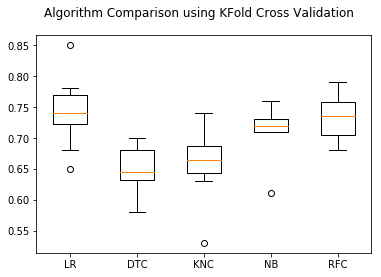

In [235]:
results = []
names = []
for name, model in models:
    #kfold = KFold(n_splits=10, random_state=seed)
    cv_result = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_result)
    names.append(name)
    msg = "%s %f (%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)

# Box Plot Comparison
fig = plt.figure()
fig.suptitle("Algorithm Comparison using KFold Cross Validation")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [236]:
#Validate the Random Forest model build above using k fold
result = cross_val_score(rfcl_model, X, y, cv=kfold)

In [237]:
#Calculate Mean score
print(" ======= Mean Score :: ",result.mean())

 ======= Mean Score ::  0.7280000000000001


In [238]:
# Calculate score standard deviation using std()
print(" =========== Std Dev :: " , result.std())

 =========== Std Dev ::  0.056356011214421485


In [239]:
result

array([0.82, 0.62, 0.77, 0.74, 0.74, 0.67, 0.74, 0.7 , 0.79, 0.69])

In [240]:
print(" ======= Confusion Matrix of Random Forest Classifier(KFold) ======= ")
res_pred = cross_val_predict(rfcl_model, X, y, cv=kfold)
confusion_matrix(y, res_pred)

 ======= Confusion Matrix of Random Forest Classifier(KFold) ======= 


array([[645,  55],
       [194, 106]])

# Q8 Print the confusion matrix( 1 Marks)

In [241]:
print(" ======= Confusion Matrix of Random Forest Classifier ======= ")
confusion_matrix(y_test, y_pred)

 ======= Confusion Matrix of Random Forest Classifier ======= 


array([[197,  17],
       [ 60,  26]])

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

*** Label 0 indicates, not a defaulter(Positive) and Label 1 indicates a DEFAULTER(Negative) ***

In [244]:

print(" ====== Sensitivity or TPR or Recall ========== TP/(Actual Positives)")
conf_matric = confusion_matrix(y_test, y_pred)
conf_matric[0][0]/(conf_matric[0][0] + conf_matric[0][1])

 ====== Sensitivity or TPR or Recall ========== TP/(Actual Positives)


0.9205607476635514

*** I could understand what this question expects? ***

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
